## Correlation Matrix

## Correlation between the balance, amount and status

In [9]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("./preprocessed/mergedTrainData.csv")
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,loan_id,date,amount,duration,payments,status,balance,itr_balance_per_account,years_since_acc_open,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of cities,ratio of urban inhabitants,average salary,no. of enterpreneurs per 1000 inhabitants,ratio entrepeneurs,criminality_growth,unemploymant_growth,no. of municipalities with inhabitants > 2000,age_group
loan_id,1.000000,-0.073635,-0.034596,-0.015887,-0.043777,0.141398,-0.091625,-0.022119,0.044846,0.120627,-0.019889,-0.014182,-0.076284,0.093544,0.125175,0.099988,0.099988,0.043549,-0.039857,-0.021847,-0.094830
date,-0.073635,1.000000,0.137957,0.187318,-0.011910,0.003985,-0.005854,0.021916,-0.807231,-0.078671,0.067730,0.019433,0.068048,-0.025851,-0.080592,-0.124107,-0.124107,-0.085881,0.117691,0.021589,-0.038053
amount,-0.034596,0.137957,1.000000,0.591093,0.643351,-0.104732,0.146665,0.206308,-0.084127,-0.027581,0.067787,0.079518,0.026281,-0.059641,-0.029223,-0.001557,-0.001557,-0.041338,-0.029472,0.073107,-0.058020
duration,-0.015887,0.187318,0.591093,1.000000,-0.128244,0.016592,-0.006997,-0.060489,-0.124343,-0.055214,0.046210,0.052986,0.031295,-0.057268,-0.053618,-0.026061,-0.026061,-0.025224,-0.020682,0.053212,0.016054
payments,-0.043777,-0.011910,0.643351,-0.128244,1.000000,-0.166757,0.151069,0.279175,0.006241,-0.038110,0.074488,0.078118,0.057569,-0.067286,-0.039750,-0.029314,-0.029314,-0.045772,0.013604,0.072125,-0.061520
status,0.141398,0.003985,-0.104732,0.016592,-0.166757,1.000000,0.204016,-0.041328,-0.020352,0.002736,0.057860,0.047665,0.025310,-0.016251,0.031130,0.029479,0.029479,0.001133,0.041746,0.045831,-0.073086
balance,-0.091625,-0.005854,0.146665,-0.006997,0.151069,0.204016,1.000000,0.380307,-0.061611,-0.048040,0.057852,0.100138,-0.013328,-0.108764,-0.061643,-0.052666,-0.052666,-0.002032,0.044784,0.088712,-0.055908
itr_balance_per_account,-0.022119,0.021916,0.206308,-0.060489,0.279175,-0.041328,0.380307,1.000000,0.023752,-0.003045,0.020208,-0.030054,0.048069,0.032485,0.009466,-0.081211,-0.081211,0.011602,0.077064,-0.030649,-0.078552
years_since_acc_open,0.044846,-0.807231,-0.084127,-0.124343,0.006241,-0.020352,-0.061611,0.023752,1.000000,0.025880,0.005378,0.021277,0.020100,-0.012957,0.012700,0.072615,0.072615,0.065580,-0.088418,0.013934,-0.005879
no. of inhabitants,0.120627,-0.078671,-0.027581,-0.055214,-0.038110,0.002736,-0.048040,-0.003045,0.025880,1.000000,-0.531148,-0.553142,-0.622510,0.706095,0.918376,0.715523,0.715523,0.817533,-0.460447,-0.566289,0.060525


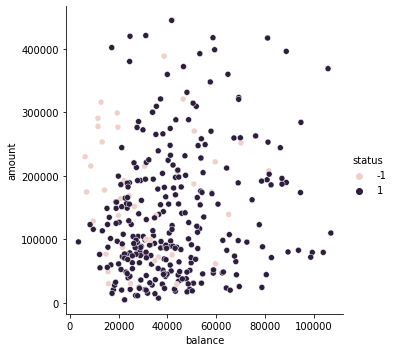

In [10]:
sns.relplot(y="amount", x="balance", hue="status", data=df);

Looking at this plot, we can observe that most of the unsuccessful loans are usually located on the left part of the chart, which means that people with low balances on their accounts are prone to fail loan payments.

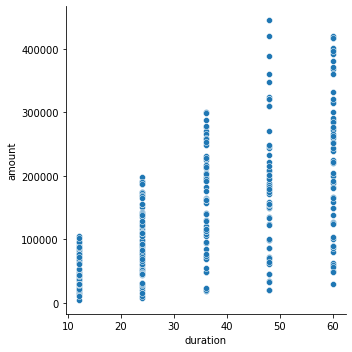

In [11]:
sns.relplot(y="amount", x="duration", data=df);

As we can see in this plot, higher duration loans result typically in higher amounts.

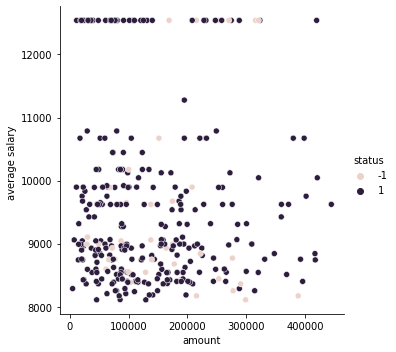

In [4]:
sns.relplot(x="amount", y="average salary ", hue="status", data=df);

## Loan Relation Plots
Looking at the following plots, it is visible the correlation between the amount, payments and duration of the loan.

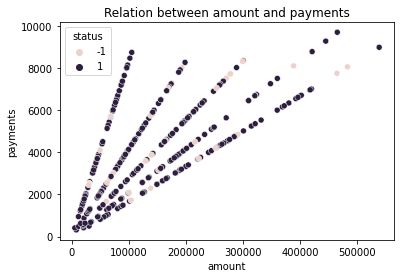

In [5]:
def scatterplot_graph(df, col1, col2, title, col_hue=None):
  if col_hue != None:
    sns.scatterplot(data=df, x=df[col1], y=df[col2], hue=col_hue).set_title(title)
  else:
    sns.scatterplot(data=df, x=df[col1], y=df[col2]).set_title(title)

loan_train_data = pd.read_csv("./files/loan_train.csv", sep=";")
scatterplot_graph(df=loan_train_data, col1="amount", col2="payments", title="Relation between amount and payments", col_hue="status")

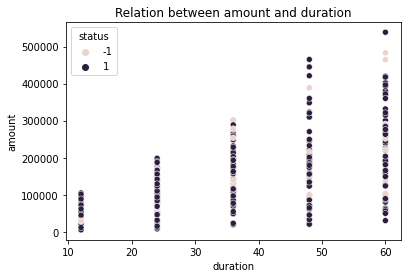

In [6]:
scatterplot_graph(df=loan_train_data, col1="duration", col2="amount", title="Relation between amount and duration", col_hue="status")

## Inter-Quartile Balance per Account and Last account Balance Relation

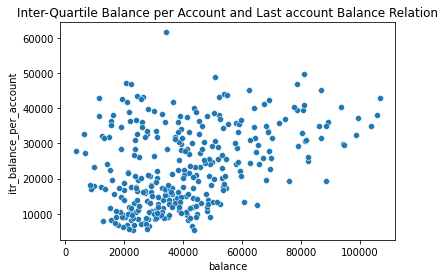

In [7]:
merged_data_train = pd.read_csv("./preprocessed/mergedTrainData.csv")
scatterplot_graph(df=merged_data_train, col1="balance", col2="itr_balance_per_account", title="Inter-Quartile Balance per Account and Last account Balance Relation")

## Age Group Distribution

In [8]:
from sklearn.preprocessing import KBinsDiscretizer

def histplot_graph(df, title, no_bins='auto', col= None):
  if col is None:
    sns.histplot(data=df, bins=no_bins).set_title(title)
  else:
    sns.histplot(data=df, x=col, bins=no_bins).set_title(title)